In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
credit = pd.read_csv("creditability.csv")

In [4]:
credit.head()
credit.dtypes
credit.info

<bound method DataFrame.info of      Creditability  Account.Balance  Duration.of.Credit  Previous.Credit  \
0                1                1                  18                4   
1                1                1                   9                4   
2                1                2                  12                2   
3                1                1                  12                4   
4                1                1                  12                4   
5                1                1                   8                4   
6                1                4                  18                4   
7                1                2                  24                2   
8                1                1                  11                4   
9                1                1                  30                4   
10               1                1                   6                4   
11               1                2                  48 

In [5]:
credit.shape

(900, 21)

In [6]:
credit.describe()


,Creditability,Account.Balance,Duration.of.Credit,Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.income,Sex.Marital.Status,...,Duration.in.Current.address,Most.valuable.asset,Age,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.700000,2.606667,21.124444,2.548889,2.821111,3262.438889,2.117778,3.387778,2.982222,2.695556,...,2.850000,2.373333,35.307778,2.672222,1.926667,1.404444,2.900000,1.151111,1.407778,1.030000
std,0.458512,1.254474,12.197579,1.077038,2.716529,2849.866173,1.582551,1.209742,1.112031,0.703228,...,1.106533,1.048629,11.265022,0.710877,0.532754,0.578424,0.654411,0.358356,0.491695,0.170682
min,0.000000,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.000000,1.000000,1373.500000,1.000000,3.000000,2.000000,2.000000,...,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.000000,2.000000,2300.000000,1.000000,3.000000,3.000000,3.000000,...,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.000000,3.000000,3967.500000,3.000000,5.000000,4.000000,3.000000,...,4.000000,3.000000,41.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.000000,10.000000,18424.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [7]:
credit.mode()

,Creditability,Account.Balance,Duration.of.Credit,Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.income,Sex.Marital.Status,...,Duration.in.Current.address,Most.valuable.asset,Age,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
0,1.0,4.0,24.0,2.0,3.0,1258,1.0,3.0,4.0,3.0,...,4.0,3.0,26.0,3.0,2.0,1.0,3.0,1.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,1393,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1478,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Menghitung kreditur baik dan buruk
credit.groupby(['Creditability'])['Creditability'].count()
#len(credit[credit['Creditability']==1])
#len(credit[credit['Creditability']==0])

Creditability
0    270
1    630
Name: Creditability, dtype: int64

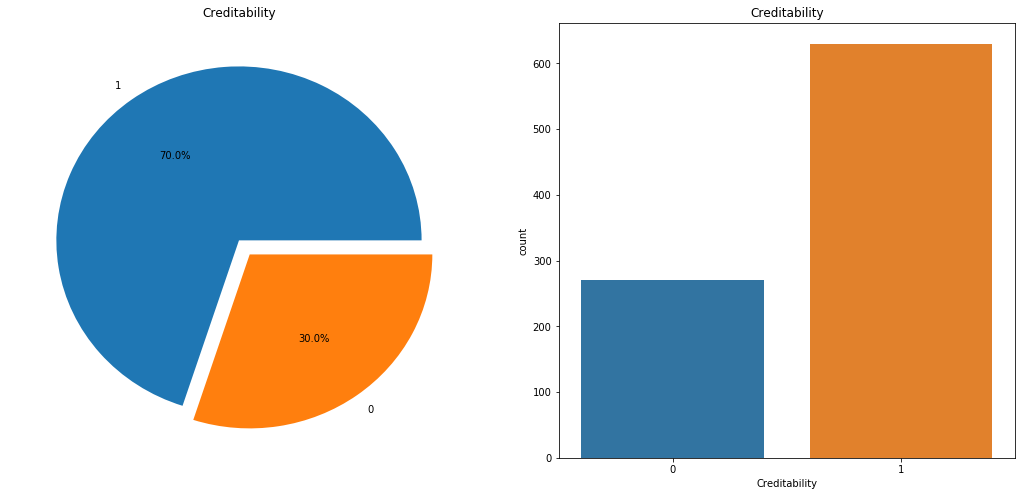

In [9]:
#Visualisasi kreditur baik dan buruk
f,ax=plt.subplots(1,2,figsize=(18,8))
credit['Creditability'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Creditability')
ax[0].set_ylabel('')
sns.countplot('Creditability',data=credit,ax=ax[1])
ax[1].set_title('Creditability')
plt.show()

- 70% dari kreditur memiliki Good credit worth, 30% memiliki bad credit worth

In [10]:
Counter(credit["Account.Balance"]).most_common()

[(4, 363), (2, 243), (1, 237), (3, 57)]

In [11]:
#Kreditur berdasarkan Account Balance
acc_bal=credit.groupby(['Account.Balance','Creditability'])['Creditability'].count()
print(acc_bal)

Account.Balance  Creditability
1                0                119
                 1                118
2                0                 93
                 1                150
3                0                 14
                 1                 43
4                0                 44
                 1                319
Name: Creditability, dtype: int64


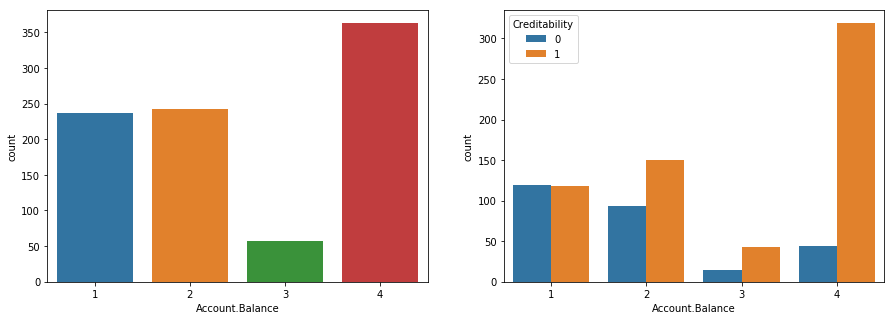

In [12]:

f,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Account.Balance', data=credit, ax=ax[0])
sns.countplot('Account.Balance',hue='Creditability',data=credit,ax=ax[1])

- account balance yang paling banyak yaitu pada kategori 4 sejumlah 363. (modus dr Acount.Balance)
- kreditur dengan account balance 4 lebih banyak masuk pada kategori good kreditur.
- Pada balance 1, proporsi kreditur yang jelek dan baik hampir sama

In [13]:
pd.crosstab(credit['Account.Balance'],credit['Creditability'],margins=True).style.background_gradient(cmap='summer_r')

Creditability,0,1,All
Account.Balance,,,
1,119,118,237
2,93,150,243
3,14,43,57
4,44,319,363
All,270,630,900


In [14]:
#Age : Paling banyak yang melakukan kredit umur berapa
Counter(credit["Age"]).most_common()


[(26, 46),
 (27, 45),
 (23, 44),
 (24, 41),
 (28, 40),
 (36, 39),
 (25, 37),
 (30, 37),
 (35, 36),
 (31, 34),
 (29, 34),
 (33, 31),
 (34, 29),
 (32, 28),
 (22, 25),
 (40, 24),
 (37, 24),
 (38, 22),
 (39, 19),
 (42, 18),
 (47, 17),
 (44, 16),
 (41, 14),
 (43, 14),
 (20, 14),
 (21, 13),
 (45, 13),
 (49, 11),
 (54, 10),
 (48, 10),
 (46, 10),
 (52, 9),
 (50, 9),
 (57, 9),
 (51, 8),
 (55, 8),
 (61, 7),
 (63, 7),
 (53, 7),
 (60, 6),
 (66, 5),
 (58, 4),
 (64, 4),
 (56, 3),
 (59, 3),
 (68, 3),
 (65, 2),
 (74, 2),
 (19, 2),
 (75, 2),
 (67, 2),
 (62, 2),
 (70, 1)]

- Umur yg paling banyak melakukan kredit adalah umur 26th

In [15]:
#Umur dikategorikan menjadi beberapa : 20-30: A, 31-40:B, 41-50: C, 51 keatas:D
conditions = [(credit['Age'] >=20) & (credit['Age'] <=29), (credit['Age'] >=30) & (credit['Age'] <=39), (credit['Age'] >=40) & (credit['Age'] <=49),(credit['Age'] >=50)]
choices =['A','B','C','D']

credit['Age1']= np.select(conditions, choices)
credit.Age1


0      A
1      B
2      A
3      B
4      B
5      B
6      D
7      A
8      B
9      A
10     B
11     B
12     A
13     C
14     C
15     A
16     B
17     B
18     B
19     C
20     B
21     A
22     C
23     D
24     A
25     B
26     A
27     D
28     C
29     B
      ..
870    B
871    A
872    A
873    A
874    C
875    B
876    B
877    A
878    A
879    B
880    B
881    D
882    A
883    B
884    A
885    A
886    B
887    B
888    A
889    A
890    A
891    A
892    C
893    D
894    B
895    A
896    C
897    B
898    D
899    B
Name: Age1, Length: 900, dtype: object

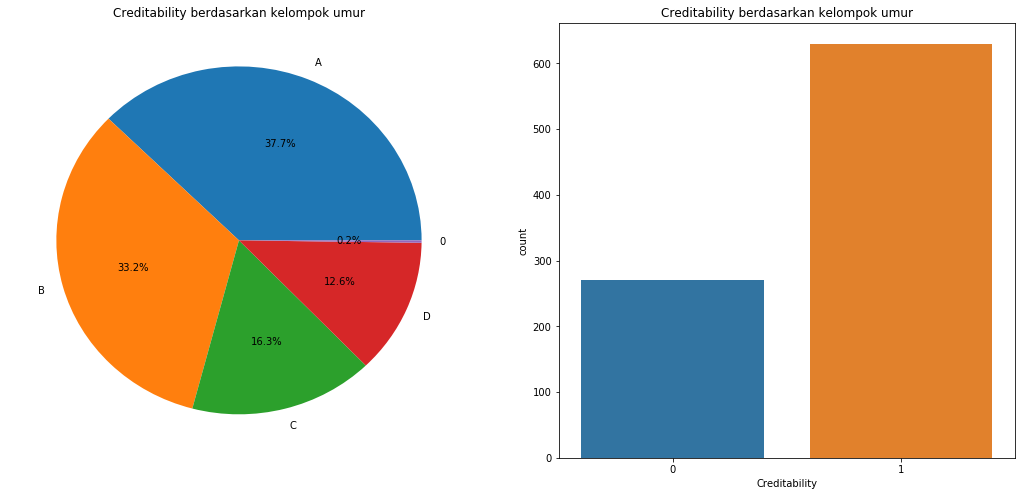

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
credit['Age1'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Creditability berdasarkan kelompok umur')
ax[0].set_ylabel('')
sns.countplot('Creditability',data=credit,ax=ax[1])
ax[1].set_title('Creditability berdasarkan kelompok umur')
plt.show()

- data dikelompokkan berdasar umur 41.8% kreditur adalah umur 20-an dan 31.8% umur 30-an. Yang artinya peminjam ada pd usia produktif bekerja

In [17]:
age_cre = pd.crosstab(credit['Age1'],credit['Creditability'],margins=True).style.background_gradient(cmap='summer_r')
age_status = pd.crosstab(credit['Age1'],credit['Sex.Marital.Status'],margins=True).style.background_gradient(cmap='summer_r')
age_status

Sex.Marital.Status,1,2,3,4,All
Age1,,,,,
0,0,2,0,0,2
A,7,156,124,52,339
B,18,62,200,19,299
C,10,26,98,13,147
D,6,32,73,2,113
All,41,278,495,86,900


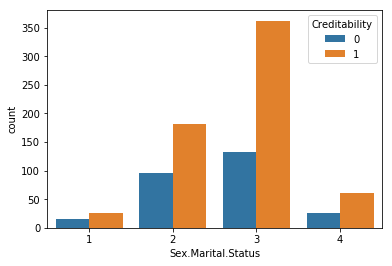

In [18]:
#Marital status
Counter(credit["Sex.Marital.Status"]).most_common()
sns.countplot("Sex.Marital.Status", hue="Creditability", data=credit)
#sns.barplot(x = "Sex.Marital.Status",y ="Age1", hue="Creditability", data=credit)

plt.show()

In [19]:
#Berdasar durasi
credit['Duration.of.Credit'].mean()
Counter(credit["Duration.of.Credit"]).most_common()

[(24, 165),
 (12, 159),
 (18, 104),
 (36, 79),
 (6, 67),
 (15, 60),
 (48, 43),
 (9, 41),
 (30, 35),
 (21, 24),
 (10, 22),
 (60, 13),
 (27, 12),
 (42, 11),
 (11, 9),
 (20, 8),
 (8, 7),
 (4, 5),
 (7, 5),
 (45, 5),
 (39, 4),
 (13, 4),
 (28, 3),
 (14, 3),
 (22, 2),
 (54, 2),
 (33, 2),
 (47, 1),
 (5, 1),
 (16, 1),
 (26, 1),
 (72, 1),
 (40, 1)]

In [20]:
x = credit[credit.Creditability==1].groupby('Duration.of.Credit').count()
x
#y = credit[credit.Creditability==0].groupby('Duration.of.Credit').count()
#y

,Creditability,Account.Balance,Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.income,Sex.Marital.Status,Guarantors,...,Most.valuable.asset,Age,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker,Age1
Duration.of.Credit,,,,,,,,,,,,,,,,,,,,,
4,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
7,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
8,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
9,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
10,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
11,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
12,119,119,119,119,119,119,119,119,119,119,...,119,119,119,119,119,119,119,119,119,119


In [21]:
#OCCUPATION
occ_age1 = pd.crosstab(credit['Age1'],credit['Occupation'],margins=True).style.background_gradient(cmap='summer_r')
occ_age1

Occupation,1,2,3,4,All
Age1,,,,,
0,0,1,1,0,2
A,11,63,241,24,339
B,2,50,184,63,299
C,2,42,84,19,147
D,7,20,62,24,113
All,22,176,572,130,900


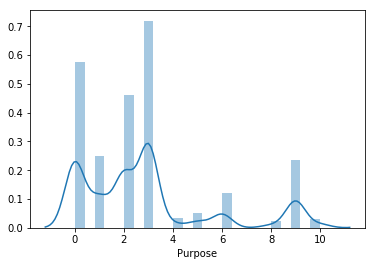

In [22]:
#PURPOSE
sns.distplot(credit['Purpose'])

In [23]:
Counter(credit["Purpose"]).most_common()

[(3, 259),
 (0, 207),
 (2, 166),
 (1, 90),
 (9, 85),
 (6, 43),
 (5, 19),
 (4, 12),
 (10, 11),
 (8, 8)]

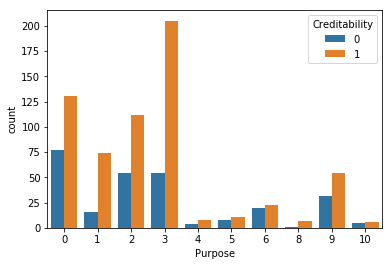

In [24]:
sns.countplot('Purpose',hue='Creditability',data=credit)

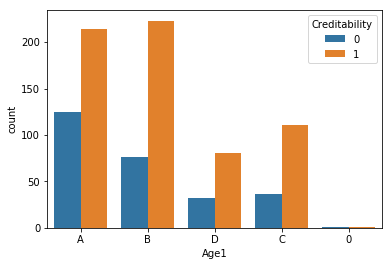

In [25]:
sns.countplot("Age1", hue="Creditability", data=credit)

In [26]:
pd.crosstab(credit['Age1'],credit['Creditability'],margins=True).style.background_gradient(cmap='summer_r')

Creditability,0,1,All
Age1,,,
0,1,1,2
A,125,214,339
B,76,223,299
C,36,111,147
D,32,81,113
All,270,630,900


In [27]:
pd.crosstab(index=credit["Creditability"], columns=[credit["Sex.Marital.Status"],credit["Age1"],credit["Occupation"]],margins=True).style.background_gradient(cmap='summer_r')

In [28]:
pd.crosstab(index=credit["Creditability"], columns=[credit["Length.of.current.employment"],credit["Occupation"]],margins=True).style.background_gradient(cmap='summer_r')

In [29]:
pd.crosstab(index=credit["Creditability"], columns=[credit["Sex.Marital.Status"],credit["No.of.dependents"]],margins=True).style.background_gradient(cmap='summer_r')

Text(0.5,1,'Creditability berdasarkan previous credit')

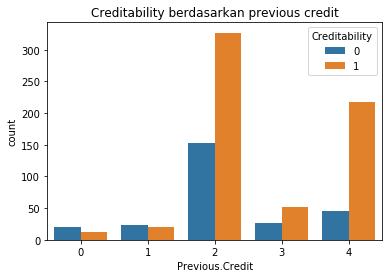

In [35]:
sns.countplot("Previous.Credit", hue="Creditability", data=credit).set_title('Creditability berdasarkan previous credit')

In [31]:
pd.crosstab(index=credit["Creditability"], columns=[credit["Previous.Credit"]],margins=True).style.background_gradient(cmap='summer_r')

Previous.Credit,0,1,2,3,4,All
Creditability,,,,,,
0,21,24,153,26,46,270
1,13,20,327,52,218,630
All,34,44,480,78,264,900
